# Stability Analysis of the Straight Pazy Wing

In this case we evaluate the stability of the straigh Pazy wing, by placing it at zero angle of attack and without gravity, thus assuming that any deformations caused by the aerodynamics are small and that the system may be linearised about the original equilibrium position.

The SHARPy results are saved under `./skin_on` or `skin_off`, depending on whether the simulation was performed with the skin on or off model. Each of these folders contain the following:
  * `vel_eigs.txt`: A three column array, where the first column corresponds to the velocity (m/s), the second to the real part of the eigenvalue (rad/s) and the third column to the imaginary part of the eigenvalue (rad/s). This file is as obtained directly from SHARPy.
  * `stability_analysis.txt`: This file has been postprocessed. Three columns containing 1) velocity (m/s), 2) damping ratio and 3)natural frequency (Hz). It has been filtered to retain frequencies below 50 Hz.
  * `flutter.txt`: file containing the flutter speed (m/s).
  
Version Control:
  * SHARPy: v1.1.1-253-g98444c3-98444c3
  * Test script: `ngoiz/pazy-sharpy/04_StraightWingFlutter` f6d4784f337e208b75abc7bc25a5a036f57247e4
  * Pazy wing model: `ngoiz/pazy-model` ec08df29cb602020cfcb5043d31a82f73f333d84


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as stats
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['figure.figsize'] = (8, 6)
%config InlineBackend.figure_format = 'retina'

In [2]:
results = {}

results['sharpy_wo_skin'] = {'path': './skin_off/',
                            'skin': False}

results['sharpy_w_skin'] = {'path': './skin_on/',
                            'skin': True}

In [3]:
for case in results.values():
    case['eigs'] = np.loadtxt(case['path'] + '/vel_eigs.txt')
    case['vg'] = np.loadtxt(case['path'] + '/stability_analysis.txt')
    with open(case['path'] + '/flutter.txt', 'r') as f:
        case['flutter_str'] = f.read()

## Flutter speeds

In [4]:
for k, case in results.items():
    print(k)
    print('\t' + case['flutter_str'])

sharpy_wo_skin
	Flutter speed = 63.0035 m/s
sharpy_w_skin
	Flutter speed = 80.0031 m/s


## Aeroelastic Eigenvalues

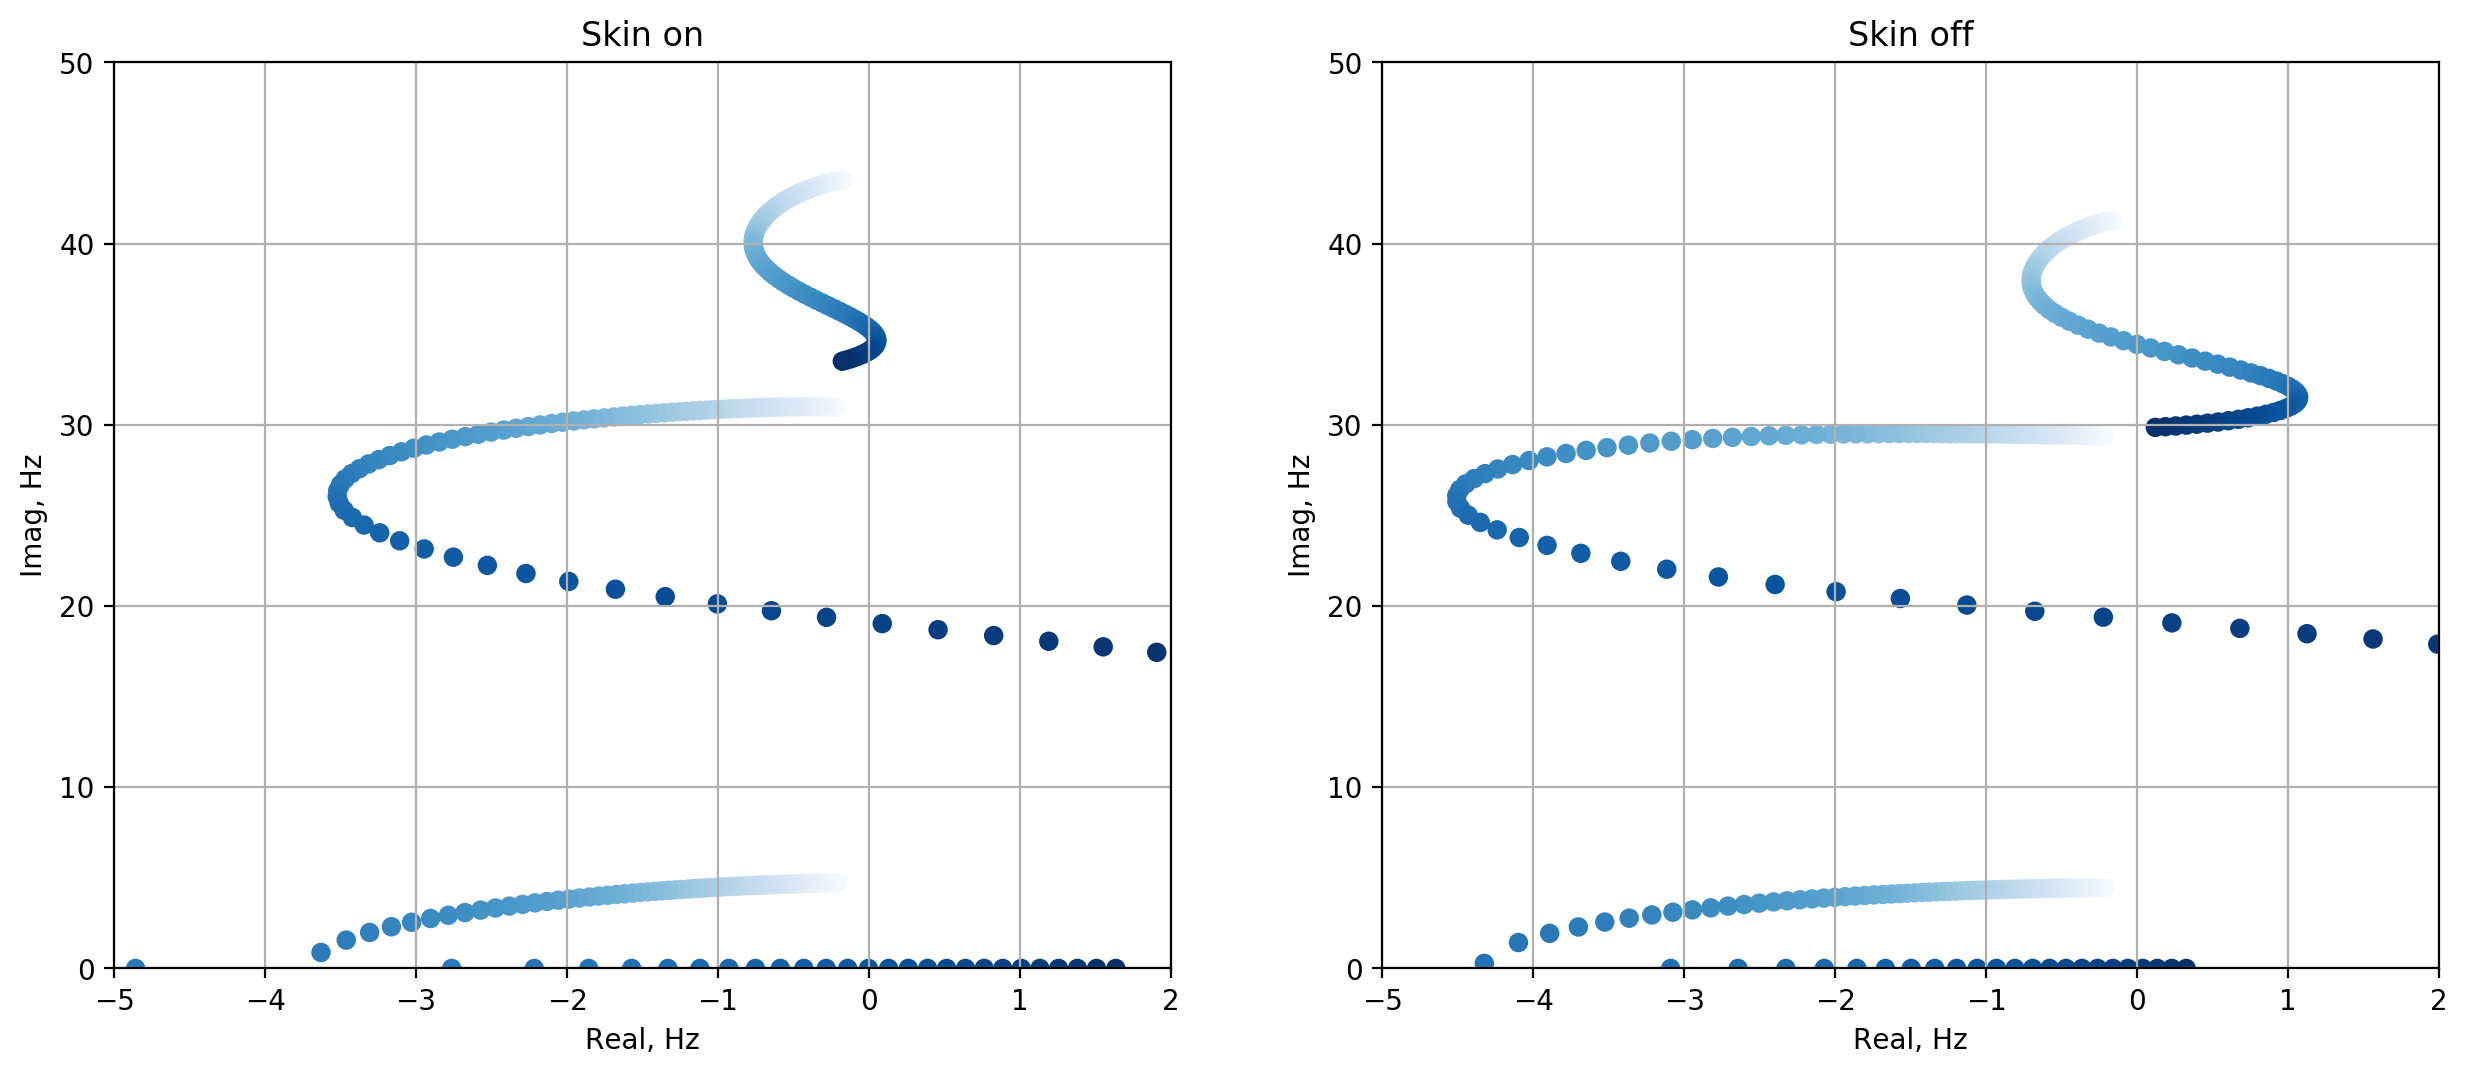

In [5]:
fig, ax = plt.subplots(ncols=2, figsize=(15,6))

for case in results.values():
    if case['skin']:
        a = ax[0]
    else:
        a = ax[1]
    a.scatter(case['eigs'][:, 1] / 2 /np.pi, case['eigs'][:, 2]/2/np.pi, c=case['eigs'][:, 0], cmap='Blues')
        
for a in ax:
    a.set_xlim(-5, 2)
    a.set_ylim(0., 50)
    a.grid()
    a.set_xlabel('Real, Hz')
    a.set_ylabel('Imag, Hz')

ax[0].set_title('Skin on')
ax[1].set_title('Skin off');

## V-g-omega plot - No Skin

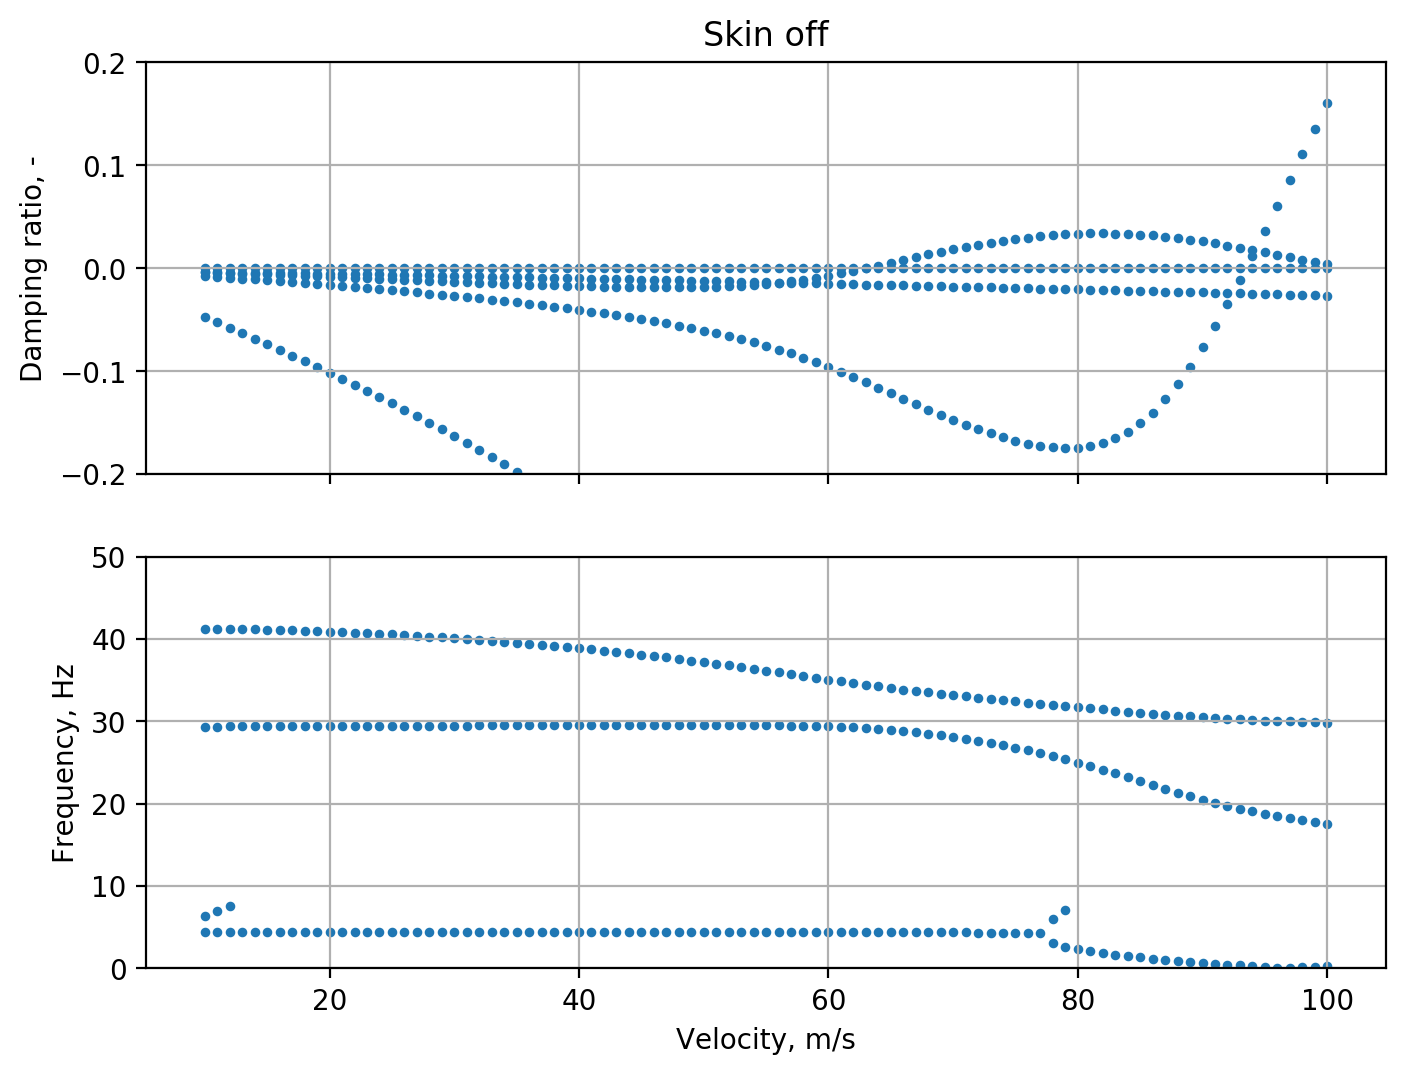

In [6]:
fig, ax = plt.subplots(nrows=2, sharex=True)

for case in results.values():
    if case['skin']:
        continue
    ax[0].scatter(case['vg'][:, 0], case['vg'][:, 1], s=6)
    ax[1].scatter(case['vg'][:, 0], case['vg'][:, 2], s=6)
    
ax[0].set_ylim(-0.2, 0.2)
ax[0].grid()
ax[1].set_ylim(0, 50)
ax[1].grid()
ax[1].set_xlabel('Velocity, m/s')
ax[1].set_ylabel('Frequency, Hz')
ax[0].set_ylabel('Damping ratio, -')
ax[0].set_title('Skin off');

## V-G-omega plot - Skin

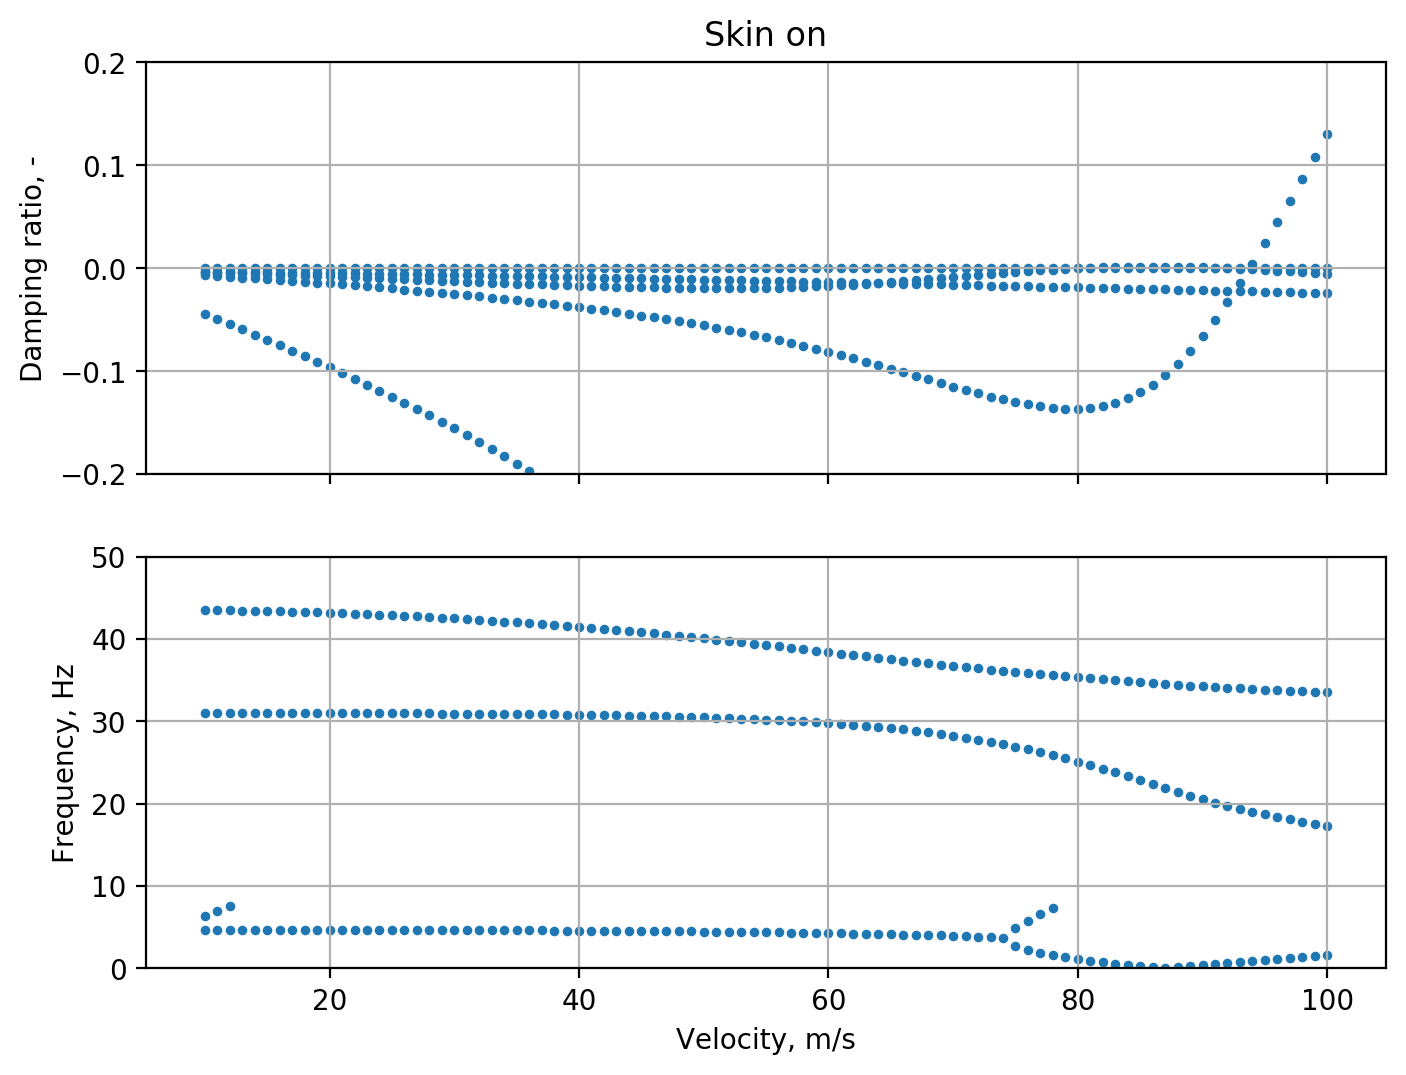

In [7]:
fig, ax = plt.subplots(nrows=2, sharex=True)

for case in results.values():
    if not case['skin']:
        continue
    ax[0].scatter(case['vg'][:, 0], case['vg'][:, 1], s=6)
    ax[1].scatter(case['vg'][:, 0], case['vg'][:, 2], s=6)
    
ax[0].set_ylim(-0.2, 0.2)
ax[0].grid()
ax[1].set_ylim(0, 50)
ax[1].grid()
ax[1].set_xlabel('Velocity, m/s')
ax[1].set_ylabel('Frequency, Hz')
ax[0].set_ylabel('Damping ratio, -')
ax[0].set_title('Skin on');